<a href="https://colab.research.google.com/github/IchiroYoshida/python_public/blob/master/MoonEclipse1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install skyfield


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 442 kB 5.1 MB/s 
     |████████████████████████████████| 228 kB 21.6 MB/s 
     |████████████████████████████████| 46 kB 2.5 MB/s 


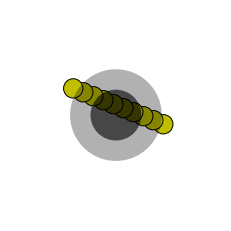

In [3]:
from skyfield.api import load
from pytz import timezone
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 初期時刻設定
ts = load.timescale()
t = ts.utc(2022, 11, 8, 8, 0, range(0, 24000,2000))
jst = timezone('Asia/Tokyo')

# 太陽・月・地球
eph = load('de421.bsp')
sun, moon, earth = eph['sun'], eph['moon'], eph['earth']

# 太陽・月の位置計算
sun_app = earth.at(t).observe(sun).apparent()
moon_app = earth.at(t).observe(moon).apparent()

separation = math.pi - sun_app.separation_from(moon_app).radians

# 地球の影（太陽）
sun_ra, sun_dec , sun_distance = sun_app.radec()

max_sun_ra = max(sun_ra.radians)

if (max_sun_ra >= math.pi):
    shadow_ra = sun_ra.radians - math.pi
else:
    shadow_ra = sun_ra.radians + math.pi
    
shadow_dec = - sun_dec.radians

#　月の位置
moon_ra, moon_dec , moon_distance = moon_app.radec()

# 太陽・月の見かけの大きさ計算
sun_radius = 696000
sun_dist = sun_app.distance().km
sun_rad = np.arctan2(sun_radius, sun_dist)

moon_radius = 1737
moon_dist = moon_app.distance().km
moon_rad = np.arctan2(moon_radius, moon_dist)

# 視差・本影の視半径計算
earth_radius = 6378

A = earth_radius - moon_dist /sun_dist * (sun_radius - earth_radius)
B = moon_dist/sun_dist * (sun_radius + earth_radius) + earth_radius

A_rad = np.arctan(A/moon_dist) #Umbra
B_rad = np.arctan(B/moon_dist) #Penumbra

rr = B_rad + moon_rad

X = - (moon_ra.radians - shadow_ra)
Y =   (moon_dec.radians - shadow_dec)

X=X[np.where(separation < rr)]
Y=Y[np.where(separation < rr)]
#T=t[np.where(separation < rr)]
#print(T[0].utc_strftime())

fig, ax = plt.subplots()

for i in range(len(X)):
    c = patches.Circle(xy=(X[i], Y[i]), radius=moon_rad[i], fc='y', ec='k', zorder = 0)
    ax.add_patch(c)

shadow1 = patches.Circle(xy=(0, 0), radius = A_rad[0], fc='k',alpha=0.6,zorder = 0)
ax.add_patch(shadow1)

shadow2 = patches.Circle(xy=(0, 0), radius = B_rad[0], fc='k',alpha=0.3,zorder = 0)
ax.add_patch(shadow2)

plt.xlim(-0.05,0.05)
plt.ylim(-0.05,0.05)

#ax.scatter(X,Y)
ax.set_aspect('equal')
ax.axis('off')

plt.show()